In [1]:
from euispice_coreg.synras.map_builder import SPICEComposedMapBuilder
from glob import glob
import astropy.units as u
import numpy as np
from euispice_coreg.hdrshift.alignment_spice import AlignmentSpice
from euispice_coreg.plot.plot import PlotFunctions
from euispice_coreg.utils.Util import AlignSpiceUtil
import matplotlib.pyplot as plt
import sunpy
import sunpy.coordinates

In [2]:
path_spice = '../../src/SPICE/20221024/solo_L2_spice-n-ras_20221024T231535_V07_150995398-000.fits'
path_to_imager_list = sorted(glob('../../src/EUI/FSI/euv174/20221024/for_spice/*.fits'))
window_spice = 3
window_imager = -1
threshold_time = 360 * u.s
output_L3_fits = '../../src/EUI/FSI/euv174/20221024/for_spice_syn/'

In [3]:
composite_map = SPICEComposedMapBuilder(path_to_spectro=path_spice,
                                        list_imager_paths=path_to_imager_list,
                                        window_imager=window_imager,
                                        window_spectro=window_spice,
                                        threshold_time=threshold_time,)
composite_map.process(output_L3_fits)


Use imager solo_L2_eui-fsi174-image_20221025T023050218_V01.fits

Use imager solo_L2_eui-fsi174-image_20221025T023050218_V01.fits

Use imager solo_L2_eui-fsi174-image_20221025T022050217_V01.fits

Use imager solo_L2_eui-fsi174-image_20221025T022050217_V01.fits

Use imager solo_L2_eui-fsi174-image_20221025T022050217_V01.fits

Use imager solo_L2_eui-fsi174-image_20221025T022050217_V01.fits

Use imager solo_L2_eui-fsi174-image_20221025T022050217_V01.fits

Use imager solo_L2_eui-fsi174-image_20221025T022050217_V01.fits

Use imager solo_L2_eui-fsi174-image_20221025T022050217_V01.fits

Use imager solo_L2_eui-fsi174-image_20221025T022050217_V01.fits

Use imager solo_L2_eui-fsi174-image_20221025T022050217_V01.fits

Use imager solo_L2_eui-fsi174-image_20221025T022050217_V01.fits

Use imager solo_L2_eui-fsi174-image_20221025T021050216_V01.fits

Use imager solo_L2_eui-fsi174-image_20221025T021050216_V01.fits

Use imager solo_L2_eui-fsi174-image_20221025T021050216_V01.fits

Use imager solo_L2_eui-f

/home/yjzhu/anaconda3/envs/euispice_coreg/lib/python3.12/site-packages/euispice_coreg/synras/map_builder.py:139: UserWarning: CRPIX3 no in original header. It is not added to the synthetic raster header
  warnings.warn(f"{k} no in original header. It is not added to the synthetic raster header")
/home/yjzhu/anaconda3/envs/euispice_coreg/lib/python3.12/site-packages/euispice_coreg/synras/map_builder.py:139: UserWarning: CRPIX4 no in original header. It is not added to the synthetic raster header
  warnings.warn(f"{k} no in original header. It is not added to the synthetic raster header")
/home/yjzhu/anaconda3/envs/euispice_coreg/lib/python3.12/site-packages/euispice_coreg/synras/map_builder.py:139: UserWarning: CRVAL3 no in original header. It is not added to the synthetic raster header
  warnings.warn(f"{k} no in original header. It is not added to the synthetic raster header")
/home/yjzhu/anaconda3/envs/euispice_coreg/lib/python3.12/site-packages/euispice_coreg/synras/map_builder.py:1

/home/yjzhu/anaconda3/envs/euispice_coreg/lib/python3.12/site-packages/euispice_coreg/hdrshift/alignment.py:429: UserWarning: Units of headers in deg: Modyfying inputs units to deg.
  warnings.warn("Units of headers in deg: Modyfying inputs units to deg.")
crval1 = -0.01: 100%|██████████| 3/3 [00:00<00:00,  7.33it/s]


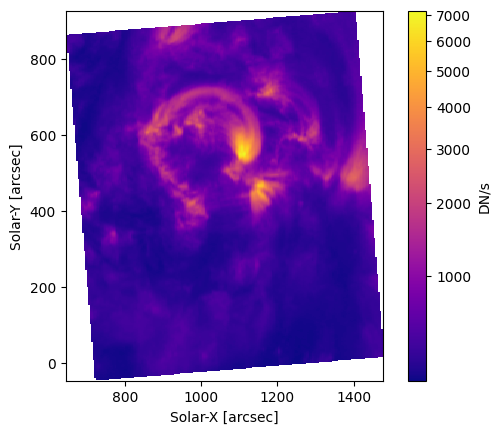

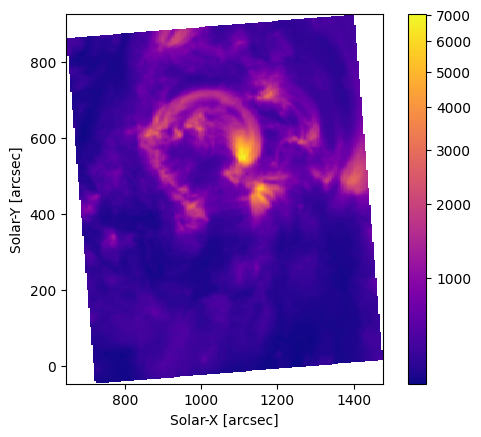

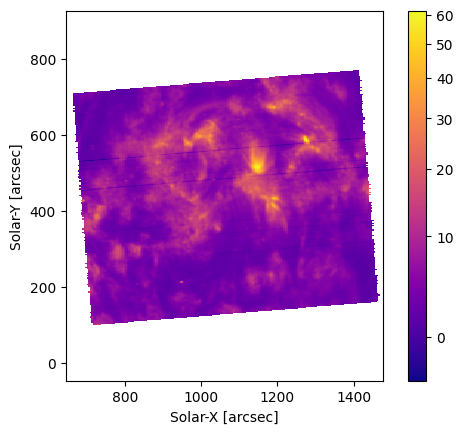

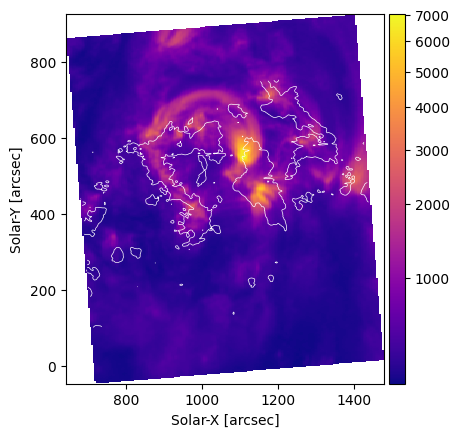

In [4]:
path_to_synthetic_raster_fits = '../../src/EUI/FSI/euv174/20221024/for_spice_syn/solo_L3_FSI174-image-composed-2022-10-25T00_51_57.fits'
window_spice_to_align = 'Ne VIII 770 - Peak'
windows_spice = [['O III 703 / Mg IX 706 (Merged)', 'S IV 750 - Peak', 'N IV 765 - Peak',
                   'Ne VIII 770 - Peak', 'S V 786 / O IV 787 (Merged)', 'N III 991 (Merged)']]

window_sr = 3
path_save_figure = '../../src/SPICE/20221024/pointing_corr/2315/'

param_alignment = {
    'lag_crval1': np.arange(-40,-25,6),
    'lag_crval2': np.arange(30,45,6),
    'lag_crota': np.arange(-5,5,5),
    'lag_cdelta1': np.array([0]),
    'lag_cdelta2': np.array([0]),
}

parallelism = True

spice_coalign_obj = AlignmentSpice(large_fov_known_pointing=path_to_synthetic_raster_fits,
                                   small_fov_to_correct=path_spice,
                                   use_tqdm=True,
                                   parallelism=parallelism,
                                   counts_cpu_max=4,
                                   large_fov_window=-1,
                                   small_fov_window=window_sr,
                                   path_save_figure=path_save_figure,
                                   **param_alignment)

spice_corr = spice_coalign_obj.align_using_helioprojective(method='correlation')

In [5]:
AlignSpiceUtil.write_corrected_fits(path_spice_l2_input=path_spice, 
                               path_spice_l2_output='../../src/SPICE/20221024/pointing_corr/2315/antoine_corr_spice_202210242315.fits', corr=spice_corr,
                                    window_spice_list=list(range(len(windows_spice))), 
                                    **param_alignment)

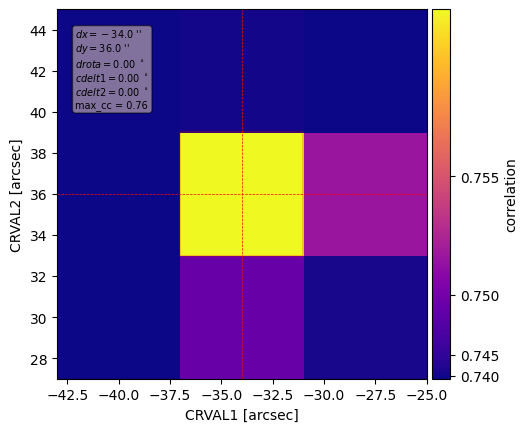

In [6]:
PlotFunctions.plot_correlation(spice_corr, **param_alignment)

/home/yjzhu/anaconda3/envs/euispice_coreg/lib/python3.12/site-packages/euispice_coreg/plot/plot.py:699: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


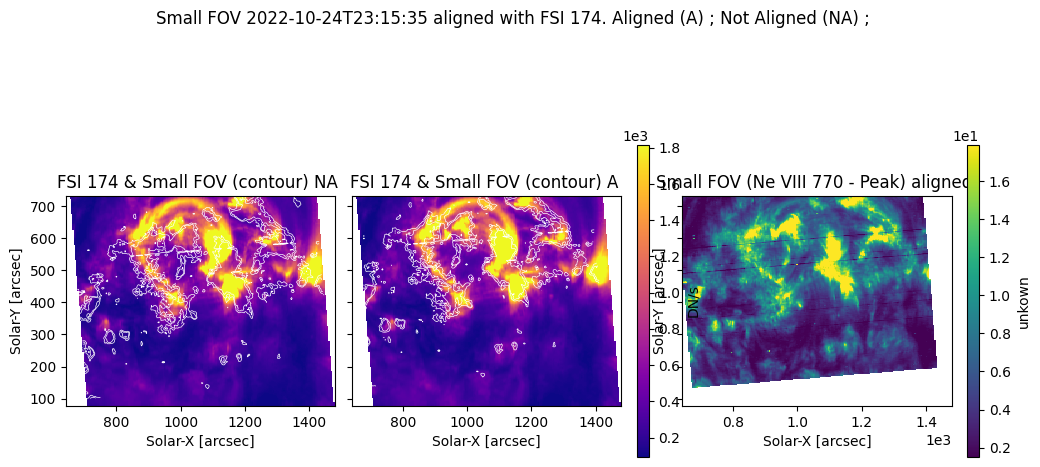

In [7]:
PlotFunctions.plot_co_alignment(large_fov_window=-1, large_fov_path=path_to_synthetic_raster_fits,
                                           corr=spice_corr, small_fov_window= window_spice_to_align, 
                                levels_percentile=[80, 90], 
                                           results_folder=None, small_fov_path=path_spice, show=True,
                                           **param_alignment)